In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# data from yelp
url = 'https://api.yelp.com/v3'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

400

In [4]:
MY_API_KEY = "227vlJRYFiz_F0D8jfqDblADE28so5LV5HcaRKWz8rn2P1iqCdykA6qXgmaLtPrSBYwq94mKhNt7V0rdWWGJKmBEYec3n80Q6XWRQkvuVbKiETkVLEoNwBRTTzVqX3Yx"

term = 'hike'
location = 'Michigan'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response_hike = requests.get(url, headers=headers, params=url_params)

In [5]:
print(response_hike)

<Response [200]>


In [6]:
response_hike.text

'{"businesses": [{"id": "R_Y6miC6P5a2mMeoLsKrUQ", "alias": "carpenter-lake-nature-preserve-southfield", "name": "Carpenter Lake Nature Preserve", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/cij1RU26So477rfoxSysGA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/carpenter-lake-nature-preserve-southfield?adjust_creative=GCm8E-vatg1JVje_1SJkFA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GCm8E-vatg1JVje_1SJkFA", "review_count": 34, "categories": [{"alias": "hiking", "title": "Hiking"}, {"alias": "parks", "title": "Parks"}], "rating": 4.5, "coordinates": {"latitude": 42.4693112400578, "longitude": -83.3195400238037}, "transactions": [], "location": {"address1": "10 Mile Rd And Inkster Rd", "address2": "", "address3": "", "city": "Southfield", "zip_code": "48033", "country": "US", "state": "MI", "display_address": ["10 Mile Rd And Inkster Rd", "Southfield, MI 48033"]}, "phone": "", "display_phone": "", "distance": 22211.287618610255}, {"id": "-

In [8]:
hike = json.loads(response_hike.text)

In [9]:
type(hike)

dict

In [10]:
hike_df = pd.DataFrame.from_dict(hike['businesses'])

In [11]:
hike_df = hike_df.loc[:,['name', 'rating', 'review_count', 'price', 'location']]

In [12]:
hike_df

,name,rating,review_count,price,location
0,Carpenter Lake Nature Preserve,4.5,34,NaN,"{'address1': '10 Mile Rd And Inkster Rd', 'add..."
1,Rouge River Greenway Trail,4.0,5,NaN,"{'address1': 'Fair Lane Dr', 'address2': '', '..."
2,Belle Isle Park,4.5,173,NaN,"{'address1': '99 Pleasure Dr', 'address2': '',..."
3,Eliza Howell Park,4.0,1,NaN,"{'address1': '23751 Fenkell Ave', 'address2': ..."
4,Clinton River Trails,5.0,2,NaN,"{'address1': '', 'address2': '', 'address3': '..."
5,Palmer Park,4.0,13,NaN,"{'address1': '910 Merrill Plaisance St', 'addr..."
6,Rouge Park,5.0,2,NaN,"{'address1': '', 'address2': '', 'address3': '..."
7,Crosswinds Marsh,4.5,4,NaN,"{'address1': '27600 Haggerty Rd', 'address2': ..."
8,Stage Nature Center,4.5,7,NaN,"{'address1': '6685 Coolidge Hwy', 'address2': ..."
9,Lower Huron Metropark,4.0,17,NaN,"{'address1': '17845 Savage Rd', 'address2': ''..."


In [14]:
hike_df = hike_df.sort_values('rating', ascending = False)
hike_df.reset_index()

,index,name,rating,review_count,price,location
0,36,Ducky Baby Charters,5.0,1,NaN,"{'address1': '28821 E River Rd', 'address2': N..."
1,4,Clinton River Trails,5.0,2,NaN,"{'address1': '', 'address2': '', 'address3': '..."
2,6,Rouge Park,5.0,2,NaN,"{'address1': '', 'address2': '', 'address3': '..."
3,28,Andy's Tackle Box,5.0,4,NaN,"{'address1': '17485 Dix Rd', 'address2': '', '..."
4,17,Cammenga Company,5.0,2,NaN,"{'address1': '2011 Bailey St', 'address2': '',..."
5,34,Madison Heights Civic Center Park,5.0,2,NaN,"{'address1': '360 W 13 Mile Rd', 'address2': '..."
6,15,West Bloomfield Trail,4.5,9,NaN,"{'address1': 'Haggerty & Walnut Lake', 'addres..."
7,8,Stage Nature Center,4.5,7,NaN,"{'address1': '6685 Coolidge Hwy', 'address2': ..."
8,7,Crosswinds Marsh,4.5,4,NaN,"{'address1': '27600 Haggerty Rd', 'address2': ..."
9,10,Rotary Park,4.5,19,NaN,"{'address1': '32184 6 Mile Rd', 'address2': ''..."


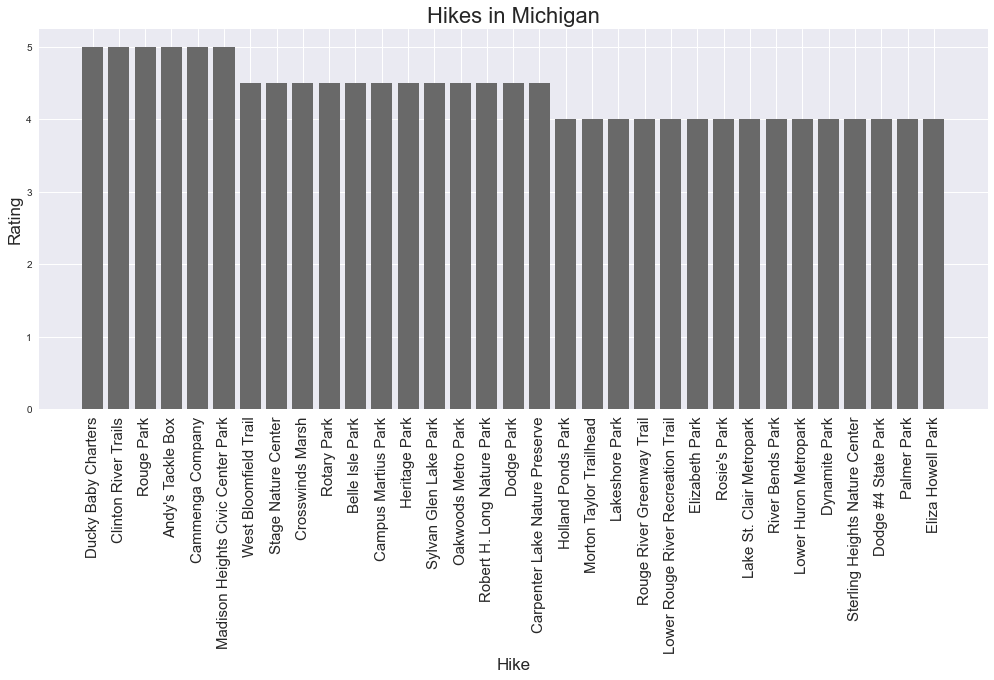

In [26]:
fig, ax = plt.subplots(figsize = (17,7))
ax.set_xlabel('Hike', fontsize = 17)
ax.set_ylabel('Rating', fontsize = 17)
ax.set_title('Hikes in Michigan', fontsize = 22)
# ax.set_xticks((0,34))
plt.xticks(rotation=90, fontsize = 15)
ax.bar(hike_df['name'][:34], hike_df['rating'][:34], color = 'dimgray')

plt.savefig('../data/MichiganHikes')